In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
import os
sys.path.append('../python/')

#set up matplotlib
os.environ['MPLCONFIGDIR'] = '../mplstyles'
print(os.environ['MPLCONFIGDIR'])
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')
print(mpl.__version__) 
print(mpl.get_configdir())


#fonts
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'32'}
legend_font = {'fontname':'Arial', 'size':'22'}

#fonts global settings
mpl.rc('font',family=legend_font['fontname'])


#set up numpy
import numpy as np

../mplstyles
3.0.3
/home/phys/villaa/analysis/misc/nrFano_paper2019/mplstyles


In [2]:
import prob_dist as prob
import imp
imp.reload(prob)

print(np.sqrt(prob.series_NRQ_var_corr(Er=38.5,F=0.0,V=4.0,aH=0.0381,alpha=(1/18.0),A=0.16,B=0.18,label='GGA3', \
                               corr1file='data/sigdiff_test1.h5')))

[[0.03414011]]


In [3]:
import h5py

f = h5py.File('data/sigdiff_test1.h5','r')
E = np.zeros((0,))
for i in f['NR/']:
  a = np.asarray([float(i)])
  E = np.concatenate((E,a))

f.close()
E = np.sort(E)

sig_corr = lambda Er: np.sqrt(prob.series_NRQ_var_corr(Er=Er,F=0.0,V=4.0,aH=0.0381, \
                alpha=(1/18.0),A=0.16,B=0.18,label='GGA3',corr1file='data/sigdiff_test1.h5'))

sig_corrv = np.vectorize(sig_corr)
print(sig_corrv(E))

sig_corr_aH301 = lambda Er: np.sqrt(prob.series_NRQ_var_corr(Er=Er,F=0.0,V=4.0,aH=0.0301, \
                alpha=(1/18.0),A=0.16,B=0.18,label='GGA3',corr1file='data/sigdiff_test1.h5'))

sig_corr_aH301v = np.vectorize(sig_corr_aH301)
print(sig_corr_aH301v(E))

[0.12438417 0.10309563 0.08890367 0.06354729 0.05371763 0.05030933
 0.0499393  0.04670264 0.04390004 0.04145088 0.03737995 0.03567228
 0.03414011 0.0327588  0.03150814 0.03037141 0.02933462 0.02838601
 0.02671485 0.02597642 0.02529398 0.02466202 0.02407572 0.02353085
 0.02255095 0.02210968 0.02169729 0.02131142 0.02061111 0.02029307
 0.01999434 0.0197135  0.01944928 0.01920054 0.01896621 0.01874531
 0.01853696 0.01834035 0.01815471 0.01797936 0.01781366 0.01765702
 0.01750889 0.01736875 0.01723614 0.01711064 0.01699182 0.0168793
 0.01677273 0.01667179 0.01657616 0.01648556 0.01639971 0.01631836
 0.01624128 0.01616824 0.01603347 0.01597136 0.01591252 0.0158568
 0.01580405 0.0157541  0.01570684 0.01566213 0.01561984 0.01557986
 0.0155421  0.01550642 0.01547274 0.01544099 0.01541104 0.01538284
 0.01535629 0.01533132 0.01530788 0.01528587 0.01526524 0.01524594
 0.01522789 0.01521105 0.01519538 0.01518079 0.01516727 0.01515476
 0.01514321 0.0151326  0.01512287 0.015114   0.01509867 0.015092

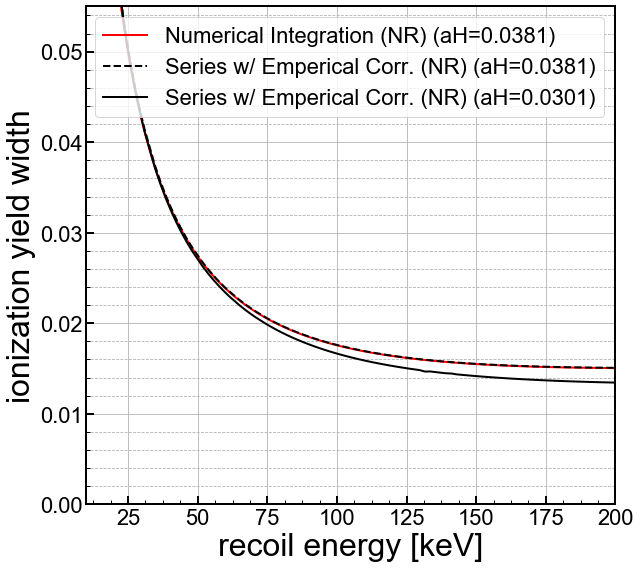

In [4]:
import fano_calc as fc

#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

#det='GGA3',band='ER',F=0.00001,V=4.0,alpha=(1/10000.0),aH=0.035,Erv=None,sigv=None,erase=False)
Enr,signr = fc.RWCalc(filename='data/res_calc.h5',alpha=1/18.0,aH=0.0381,band='NR')


#ax1.plot(X,sigQnrv(X),color='r',linestyle="--",linewidth=2, \
#         label='single-scatter res. model (NR) (aH={})'.format(aH))
#ax1.plot(xl,np.sqrt(Sigss**2),color='r',linestyle="-",linewidth=2, \
#         label='(C$_0$={:01.3}; m={:01.2E})'.format(0.0,0.0))
ax1.plot(Enr,signr,color='r',linestyle="-",linewidth=2, \
         label='Numerical Integration (NR) (aH={})'.format(0.0381))
ax1.plot(E,sig_corrv(E),color='k',linestyle="--",linewidth=2, \
         label='Series w/ Emperical Corr. (NR) (aH={})'.format(0.0381))
ax1.plot(E,sig_corr_aH301v(E),color='k',linestyle="-",linewidth=2, \
         label='Series w/ Emperical Corr. (NR) (aH={})'.format(0.0301))
#ax1.plot(X,np.sqrt(pd.series_NRQ_var(X,V=4.0,F=0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='g',linestyle="-",linewidth=2, \
#         label='Series Approximation (NR) (aH={})'.format(0.0381))
#ax1.plot(X,np.sqrt(pd.analytical_NRQ_var(X,V=4.0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='b',linestyle="-",linewidth=2, \
#         label='Analytical Integral (ER) (aH={})'.format(0.0381))



ymin = 0.0
ymax = 0.055



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(10, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()

In [5]:
Ediffs = 125.0

In [6]:

corr_A = lambda A: prob.series_NRQ_sig_c2(Er=Ediffs,F=0.0,V=4.0,aH=0.0381,alpha=(1/18.0),A=A, \
                                        B=0.18,label='GGA3',corr1file='data/sigdiff_test1.h5')

print(corr_A(0.16))
corr_Av = np.vectorize(corr_A)


[[-2.51248731e-09]]


In [7]:
delA = np.arange(0.09,0.24,0.01)
print(corr_Av(delA))

[-9.25663238e-04 -7.62753573e-04 -4.61439598e-04 -5.10360769e-04
 -2.71964731e-04             nan -2.51248731e-09 -2.51248731e-09
 -2.51248731e-09  4.35220938e-04  4.35220938e-04  7.97202357e-04
  7.97202357e-04  7.97202357e-04  7.97202357e-04]


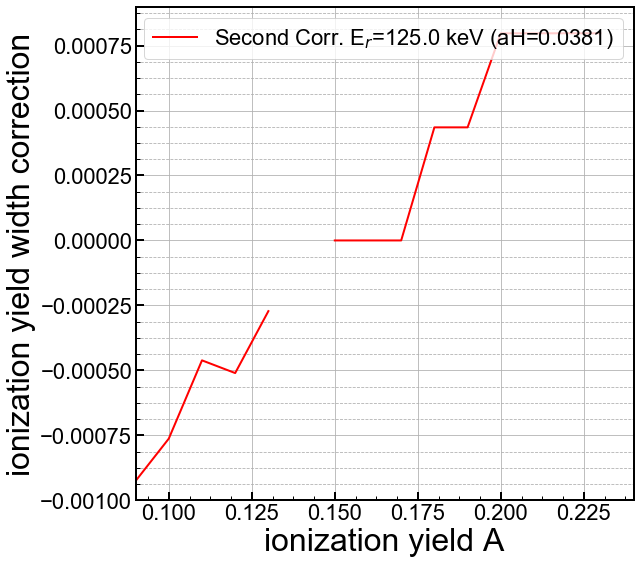

In [8]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

#det='GGA3',band='ER',F=0.00001,V=4.0,alpha=(1/10000.0),aH=0.035,Erv=None,sigv=None,erase=False)
Enr,signr = fc.RWCalc(filename='data/res_calc.h5',alpha=1/18.0,aH=0.0381,band='NR')


#ax1.plot(X,sigQnrv(X),color='r',linestyle="--",linewidth=2, \
#         label='single-scatter res. model (NR) (aH={})'.format(aH))
#ax1.plot(xl,np.sqrt(Sigss**2),color='r',linestyle="-",linewidth=2, \
#         label='(C$_0$={:01.3}; m={:01.2E})'.format(0.0,0.0))
ax1.plot(delA,corr_Av(delA),color='r',linestyle="-",linewidth=2, \
         label='Second Corr. E$_r$={:3.1f} keV (aH={})'.format(Ediffs,0.0381))

#ax1.plot(X,np.sqrt(pd.series_NRQ_var(X,V=4.0,F=0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='g',linestyle="-",linewidth=2, \
#         label='Series Approximation (NR) (aH={})'.format(0.0381))
#ax1.plot(X,np.sqrt(pd.analytical_NRQ_var(X,V=4.0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='b',linestyle="-",linewidth=2, \
#         label='Analytical Integral (ER) (aH={})'.format(0.0381))



ymin = -1.0e-3
ymax = 9.0e-4



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.09, 0.24) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'ionization yield A',**axis_font)
ax1.set_ylabel('ionization yield width correction',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/SecondCorr_Er{:03.0f}_A.png'.format(Ediffs))
plt.show()

In [9]:
#get central value
cv = prob.series_NRQ_var_corr(Er=Ediffs,F=0.0,V=4.0,aH=0.0381,alpha=(1/18.0),A=0.16, \
                                        B=0.18,label='GGA3',corr1file='data/sigdiff_test1.h5')

print(cv[0][0])
cv = np.sqrt(cv[0][0])
print(cv)

#try to get this value for the final sigma value for NR (C and M included)
Cfit = 0.04012
mfit = 4.11e-5
cv_high = np.sqrt(cv**2 + (Cfit+mfit*Ediffs)**2)
print(cv_high)

0.0002625160696349448
0.016202347658131052
0.048070337796659444


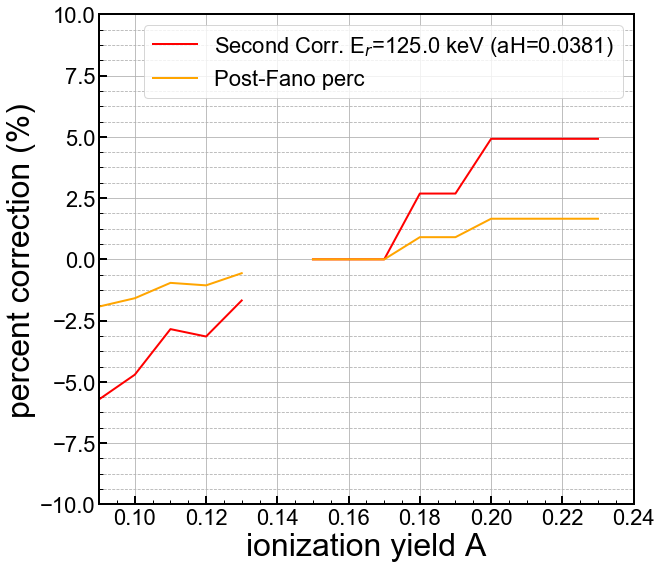

In [10]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

#det='GGA3',band='ER',F=0.00001,V=4.0,alpha=(1/10000.0),aH=0.035,Erv=None,sigv=None,erase=False)
Enr,signr = fc.RWCalc(filename='data/res_calc.h5',alpha=1/18.0,aH=0.0381,band='NR')


#ax1.plot(X,sigQnrv(X),color='r',linestyle="--",linewidth=2, \
#         label='single-scatter res. model (NR) (aH={})'.format(aH))
#ax1.plot(xl,np.sqrt(Sigss**2),color='r',linestyle="-",linewidth=2, \
#         label='(C$_0$={:01.3}; m={:01.2E})'.format(0.0,0.0))
ax1.plot(delA,(corr_Av(delA)/cv)*100,color='r',linestyle="-",linewidth=2, \
         label='Second Corr. E$_r$={:3.1f} keV (aH={})'.format(Ediffs,0.0381))
ax1.plot(delA,(corr_Av(delA)/cv_high)*100,color='orange',linestyle="-",linewidth=2, \
         label='Post-Fano perc'.format(Ediffs,0.0381))

#ax1.plot(X,np.sqrt(pd.series_NRQ_var(X,V=4.0,F=0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='g',linestyle="-",linewidth=2, \
#         label='Series Approximation (NR) (aH={})'.format(0.0381))
#ax1.plot(X,np.sqrt(pd.analytical_NRQ_var(X,V=4.0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='b',linestyle="-",linewidth=2, \
#         label='Analytical Integral (ER) (aH={})'.format(0.0381))



ymin = -10
ymax = 10



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.09, 0.24) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'ionization yield A',**axis_font)
ax1.set_ylabel('percent correction (%)',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/SecondCorr_Er{:03.0f}_A_perc.png'.format(Ediffs))
plt.show()

In [11]:

corr_B = lambda B: prob.series_NRQ_sig_c2(Er=Ediffs,F=0.0,V=4.0,aH=0.0381,alpha=(1/18.0),A=0.16, \
                                        B=B,label='GGA3',corr1file='data/sigdiff_test1.h5')

print(corr_B(0.18))
corr_Bv = np.vectorize(corr_B)

delB = np.arange(0.09,0.24,0.01)
print(corr_Bv(delB))


[[-2.51248731e-09]]
[-1.10386685e-03 -1.00984158e-03 -1.04049371e-03 -7.70308958e-04
 -7.70308958e-04 -6.30750105e-04             nan             nan
 -2.03724859e-04 -2.51248731e-09  4.72732866e-04  4.72732866e-04
  6.22316324e-04  6.22316324e-04  1.24830633e-03]


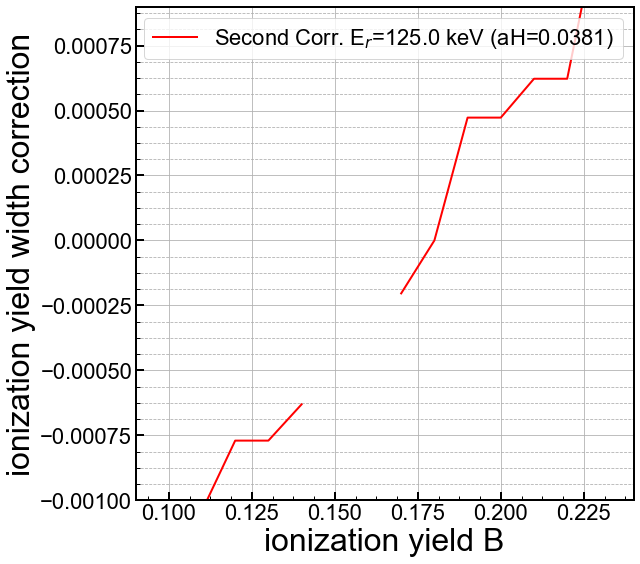

In [12]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

#det='GGA3',band='ER',F=0.00001,V=4.0,alpha=(1/10000.0),aH=0.035,Erv=None,sigv=None,erase=False)
Enr,signr = fc.RWCalc(filename='data/res_calc.h5',alpha=1/18.0,aH=0.0381,band='NR')


#ax1.plot(X,sigQnrv(X),color='r',linestyle="--",linewidth=2, \
#         label='single-scatter res. model (NR) (aH={})'.format(aH))
#ax1.plot(xl,np.sqrt(Sigss**2),color='r',linestyle="-",linewidth=2, \
#         label='(C$_0$={:01.3}; m={:01.2E})'.format(0.0,0.0))
ax1.plot(delB,corr_Bv(delB),color='r',linestyle="-",linewidth=2, \
         label='Second Corr. E$_r$={:3.1f} keV (aH={})'.format(Ediffs,0.0381))

#ax1.plot(X,np.sqrt(pd.series_NRQ_var(X,V=4.0,F=0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='g',linestyle="-",linewidth=2, \
#         label='Series Approximation (NR) (aH={})'.format(0.0381))
#ax1.plot(X,np.sqrt(pd.analytical_NRQ_var(X,V=4.0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='b',linestyle="-",linewidth=2, \
#         label='Analytical Integral (ER) (aH={})'.format(0.0381))



ymin = -1.0e-3
ymax = 9.0e-4



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.09, 0.24) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'ionization yield B',**axis_font)
ax1.set_ylabel('ionization yield width correction',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/SecondCorr_Er{:03.0f}_B.png'.format(Ediffs))
plt.show()

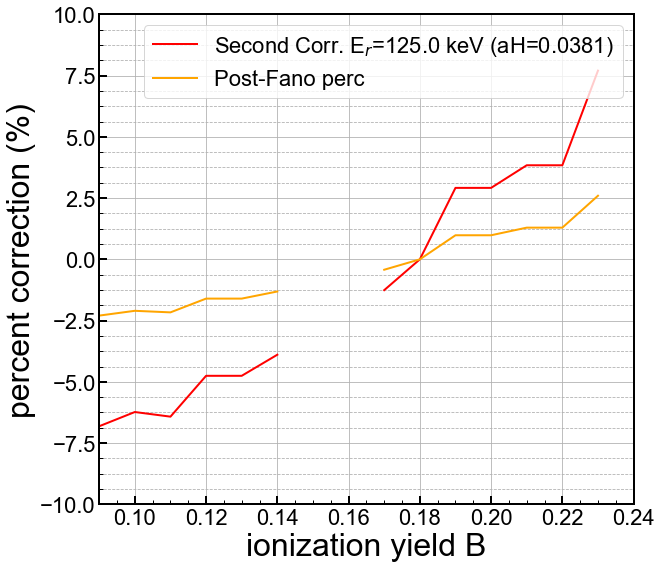

In [13]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

#det='GGA3',band='ER',F=0.00001,V=4.0,alpha=(1/10000.0),aH=0.035,Erv=None,sigv=None,erase=False)
Enr,signr = fc.RWCalc(filename='data/res_calc.h5',alpha=1/18.0,aH=0.0381,band='NR')


#ax1.plot(X,sigQnrv(X),color='r',linestyle="--",linewidth=2, \
#         label='single-scatter res. model (NR) (aH={})'.format(aH))
#ax1.plot(xl,np.sqrt(Sigss**2),color='r',linestyle="-",linewidth=2, \
#         label='(C$_0$={:01.3}; m={:01.2E})'.format(0.0,0.0))
ax1.plot(delB,(corr_Bv(delB)/cv)*100,color='r',linestyle="-",linewidth=2, \
         label='Second Corr. E$_r$={:3.1f} keV (aH={})'.format(Ediffs,0.0381))
ax1.plot(delB,(corr_Bv(delB)/cv_high)*100,color='orange',linestyle="-",linewidth=2, \
         label='Post-Fano perc'.format(Ediffs,0.0381))

#ax1.plot(X,np.sqrt(pd.series_NRQ_var(X,V=4.0,F=0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='g',linestyle="-",linewidth=2, \
#         label='Series Approximation (NR) (aH={})'.format(0.0381))
#ax1.plot(X,np.sqrt(pd.analytical_NRQ_var(X,V=4.0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='b',linestyle="-",linewidth=2, \
#         label='Analytical Integral (ER) (aH={})'.format(0.0381))



ymin = -10
ymax = 10



ax1.set_yscale('linear')
#ax1.set_yscale('log') 
ax1.set_xlim(0.09, 0.24)
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'ionization yield B',**axis_font)
ax1.set_ylabel('percent correction (%)',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/SecondCorr_Er{:03.0f}_B_perc.png'.format(Ediffs))
plt.show()

In [14]:
import EdwRes as er

corr_aH = lambda varaH: prob.series_NRQ_sig_c2(Er=100.0,F=0.0,V=4.0,aH=varaH,alpha=(1/18.0),A=0.16, \
                                        B=0.18,label='GGA3',corr1file='data/sigdiff_test1.h5')

print(corr_aH(0.0381))
corr_aHv = np.vectorize(corr_aH)

print(0.0135/er.FWHM_to_SIG) #remember Amy's plot uses the other version of aH
print(0.0180/er.FWHM_to_SIG)
b = 0.0150/er.FWHM_to_SIG
t = 0.0165/er.FWHM_to_SIG

delaH = np.arange(b,t,0.0005)
print(delaH)
print(corr_aHv(delaH))



[[-2.81085219e-09]]
0.03179007060791782
0.04238676081055708
[0.0353223 0.0358223 0.0363223 0.0368223 0.0373223 0.0378223 0.0383223
 0.0388223]
[-2.81085219e-09 -2.81085219e-09 -2.81085219e-09 -2.81085219e-09
 -2.81085219e-09 -2.81085219e-09 -2.81085219e-09 -2.81085219e-09]


In [15]:
corr_V = lambda V: prob.series_NRQ_sig_c2(Er=Ediffs,F=0.0,V=V,aH=0.0381,alpha=(1/18.0),A=0.16, \
                                        B=0.18,label='GGA3',corr1file='data/sigdiff_test1.h5')

print(corr_V(4.0))
corr_Vv = np.vectorize(corr_V)

print(0.9*4.0)
print(1.2*4.0)
Vb = 0.9*4.0
Vh = 1.2*4.0

delV = np.arange(Vb,Vh,0.05)
print(corr_Vv(delV))

[[-2.51248731e-09]]
3.6
4.8
[-1.99410759e-05 -1.99410759e-05  3.90899190e-04  3.90899190e-04
  1.25944357e-04 -9.91804416e-05 -9.91804416e-05 -2.51248731e-09
 -2.51248731e-09  1.51579235e-04 -6.89044135e-06 -1.98166402e-04
  1.71546994e-04 -1.47299064e-04 -1.75642362e-04 -5.80221054e-05
  5.60889755e-05  5.60889755e-05  5.60889755e-05 -7.61772991e-05
 -7.61772991e-05 -7.61772991e-05             nan  3.87348815e-04]


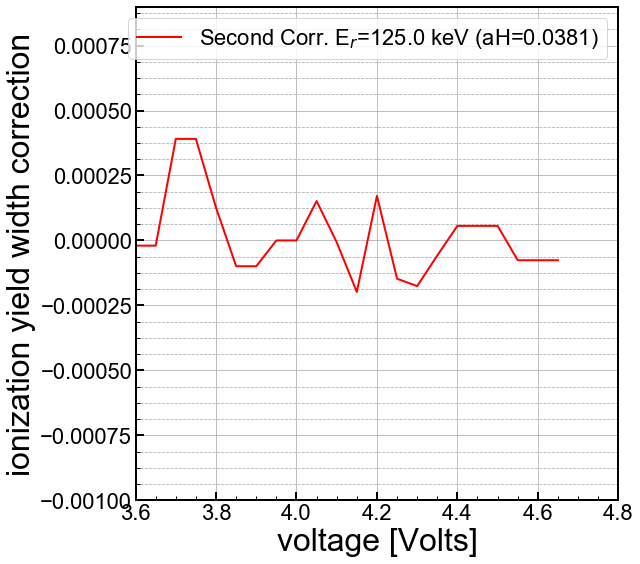

In [16]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

#det='GGA3',band='ER',F=0.00001,V=4.0,alpha=(1/10000.0),aH=0.035,Erv=None,sigv=None,erase=False)
Enr,signr = fc.RWCalc(filename='data/res_calc.h5',alpha=1/18.0,aH=0.0381,band='NR')


#ax1.plot(X,sigQnrv(X),color='r',linestyle="--",linewidth=2, \
#         label='single-scatter res. model (NR) (aH={})'.format(aH))
#ax1.plot(xl,np.sqrt(Sigss**2),color='r',linestyle="-",linewidth=2, \
#         label='(C$_0$={:01.3}; m={:01.2E})'.format(0.0,0.0))
ax1.plot(delV,corr_Vv(delV),color='r',linestyle="-",linewidth=2, \
         label='Second Corr. E$_r$={:3.1f} keV (aH={})'.format(Ediffs,0.0381))

#ax1.plot(X,np.sqrt(pd.series_NRQ_var(X,V=4.0,F=0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='g',linestyle="-",linewidth=2, \
#         label='Series Approximation (NR) (aH={})'.format(0.0381))
#ax1.plot(X,np.sqrt(pd.analytical_NRQ_var(X,V=4.0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='b',linestyle="-",linewidth=2, \
#         label='Analytical Integral (ER) (aH={})'.format(0.0381))



ymin = -1.0e-3
ymax = 9.0e-4



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(Vb, Vh) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'voltage [Volts]',**axis_font)
ax1.set_ylabel('ionization yield width correction',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/SecondCorr_Er{:03.0f}_V.png'.format(Ediffs))
plt.show()

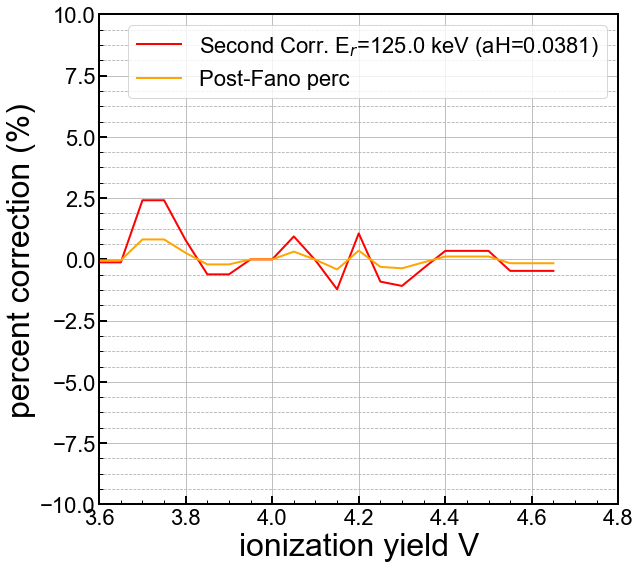

In [17]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

#det='GGA3',band='ER',F=0.00001,V=4.0,alpha=(1/10000.0),aH=0.035,Erv=None,sigv=None,erase=False)
Enr,signr = fc.RWCalc(filename='data/res_calc.h5',alpha=1/18.0,aH=0.0381,band='NR')


#ax1.plot(X,sigQnrv(X),color='r',linestyle="--",linewidth=2, \
#         label='single-scatter res. model (NR) (aH={})'.format(aH))
#ax1.plot(xl,np.sqrt(Sigss**2),color='r',linestyle="-",linewidth=2, \
#         label='(C$_0$={:01.3}; m={:01.2E})'.format(0.0,0.0))
ax1.plot(delV,(corr_Vv(delV)/cv)*100,color='r',linestyle="-",linewidth=2, \
         label='Second Corr. E$_r$={:3.1f} keV (aH={})'.format(Ediffs,0.0381))
ax1.plot(delV,(corr_Vv(delV)/cv_high)*100,color='orange',linestyle="-",linewidth=2, \
         label='Post-Fano perc'.format(Ediffs,0.0381))

#ax1.plot(X,np.sqrt(pd.series_NRQ_var(X,V=4.0,F=0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='g',linestyle="-",linewidth=2, \
#         label='Series Approximation (NR) (aH={})'.format(0.0381))
#ax1.plot(X,np.sqrt(pd.analytical_NRQ_var(X,V=4.0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='b',linestyle="-",linewidth=2, \
#         label='Analytical Integral (ER) (aH={})'.format(0.0381))



ymin = -10
ymax = 10



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(Vb, Vh) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'ionization yield V',**axis_font)
ax1.set_ylabel('percent correction (%)',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/SecondCorr_Er{:03.0f}_V_perc.png'.format(Ediffs))
plt.show()